In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Question 1 Loop Efficiency
## a. Plot the runtime.

[]

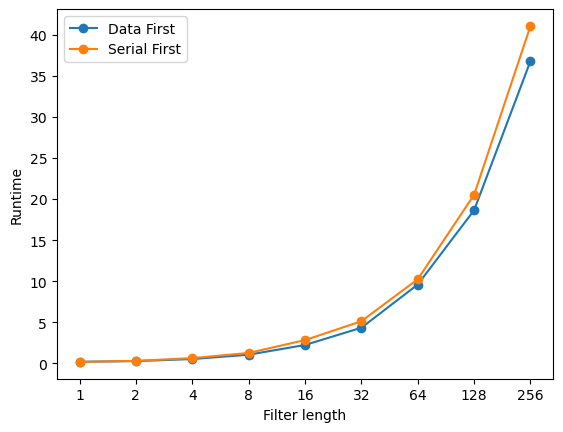

In [26]:
filter_len=np.array([1,2,4,8,16,32,64,128,256,])
time_data1=np.array([0.207741,0.292012,0.540427,1.068938,2.251788,4.348912,9.603803,18.641156,36.776433,])
time_filter1=np.array([0.190760,0.318233,0.653442,1.280147,2.845332,5.138833,10.250091,20.517090,41.045419,])

plt.plot(range(9), time_data1, marker='o', label='Data First')
plt.plot(range(9), time_filter1, marker='o', label='Serial First')
plt.xticks(range(9), filter_len)
plt.xlabel('Filter length')
plt.ylabel('Runtime')
plt.legend()
plt.plot()

## 1b
Efficiency = filter_len / runtime  
The efficiency stop increaseing after around 8 filter length. The runtime for short filter is too fast, so the cost is mostly due to startup cost.

[]

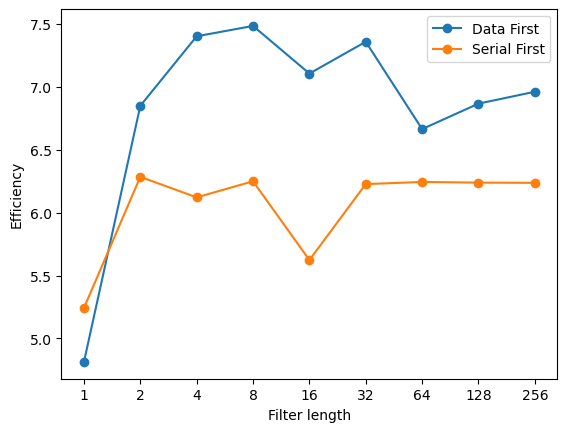

In [27]:
filter_len=np.array([1,2,4,8,16,32,64,128,256,])
time_data1=np.array([0.207741,0.292012,0.540427,1.068938,2.251788,4.348912,9.603803,18.641156,36.776433,])
time_filter1=np.array([0.190760,0.318233,0.653442,1.280147,2.845332,5.138833,10.250091,20.517090,41.045419,])

plt.plot(range(9), filter_len/time_data1, marker='o', label='Data First')
plt.plot(range(9), filter_len/time_filter1, marker='o', label='Serial First')
plt.xticks(range(9), filter_len)
plt.xlabel('Filter length')
plt.ylabel('Efficiency')
plt.legend()
plt.plot()

## 1c
SerialFilterFirst faster when the data length is shorter than the filter length, so the access to the data array is more frequent which can leverage the caches.

## 1d
Normally, for long data array, Datafirst is faster because the inner loop is more effective with caches, i.e the filter length is short.

## 2a

[]

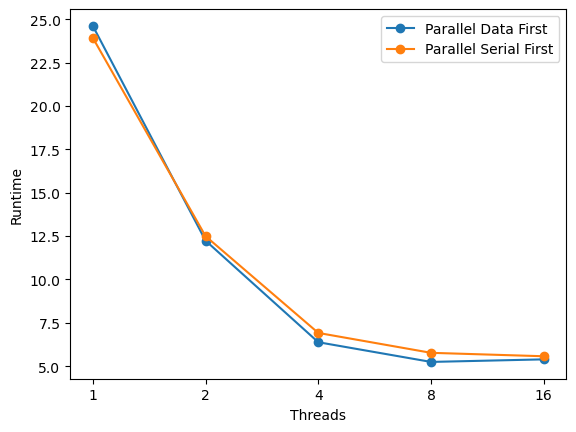

In [36]:
# nthread=np.array([1,2,4,8,16,])
# time_data2=np.array([37.701309,18.822835,9.403934,4.805571,2.447610,])
# time_filter2=np.array([41.375285,20.852920,10.410189,5.228828,2.748968,])
nthread=np.array([1,2,4,8,16,])
time_data2=np.array([24.610960,12.235378,6.380819,5.245263,5.392897,])
time_filter2=np.array([23.924324,12.493232,6.916190,5.769843,5.571990,])
L = len(nthread)
plt.plot(range(L), time_data2, marker='o', label='Parallel Data First')
plt.plot(range(L), time_filter2, marker='o', label='Parallel Serial First')
plt.xticks(range(L), nthread)
plt.xlabel('Threads')
plt.ylabel('Runtime')
plt.legend()
plt.plot()

## 2b
Speed up stop increasing after using more threads than the available cpu cores (8 cores in my computer).

## 2c

In [52]:
np.mean(((time_data2[1:]/time_data2[0]) - 1)/(1/nthread[1:]-1))

0.9313890133656286

In [53]:
np.mean(((time_filter2[1:]/time_filter2[0]) - 1)/(1/nthread[1:]-1))

0.8972405784490256

Amdalh number for data first and filter first is 0.93 and and 0.89, respectively.

## 2d
ParallelDataFirst is faster. As the same reason for DataFirst is faster in serial manner. Now it is speedup in parallel. 

## 2e
ParallelDataFirst is more scalable because it is benefit from increasing more processors. As we can see the Amdahl number in DataFirst is bigger.

## 2f
The startup cost to create and destroy thread. We can eleminate interference because thread are not waiting for the results of others. We can also eleminate skew because the task are equally distributed.

## 3a
Unrolled inner loop is more efficient. Outer loop only unroll by a factor of 8, while the inner loop unroll by a factor of 8 in each iteration of the outer loop. The latter unroll more, which is more efficient.

## 3b
The condition operations (if statement) are eliminated. 8 instruction are eliminated since we unrolled by a factor of eight.

## 3c
The data first and unroller inner loop is the most efficient. The explanation would be due to part 1 and 3a, which is because cache memory and we eliminated for if statement with inner loop.